In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


data = pd.read_csv('/content/carbonemissions_improved.csv')

In [3]:

data.head()

country  year  cereal_yield  fdi_perc_gdp  en_per_gdp  en_per_cap  \
0     AGO  1991         417.4      5.449515  179.271884  565.451027   
1     AGO  1992         397.0      4.982460  193.632183  550.548264   
2     AGO  1993         267.8      5.715529  266.318379  551.688878   
3     AGO  1994         298.4      4.195018  260.830190  541.553067   
4     AGO  1995         402.2      9.374417  237.623934  528.386164   

     co2_ttl  co2_per_cap  co2_per_gdp  pop_urb_aggl_perc  prot_area_perc  \
0   4367.397     0.409949   129.971142          15.290728       12.399822   
1   4418.735     0.401597   141.244823          15.660630       12.399823   
2   5801.194     0.510141   246.261769          16.025739       12.399823   
3   3890.687     0.331321   159.575256          16.065941       12.399824   
4  11012.001     0.909699   409.106543          16.134424       12.399825   

            gdp  gni_per_cap  under_5_mort_rate         pop      urb_pop  
0  1.219375e+10        820.0              239.1  10653515.0  4099472.572  
1  5.779394e+09        470.0              235.3  11002910.0  4385759.926  
2  5.285600e+09        310.0              231.1  11371750.0  4689709.700  
3  4.059577e+09        190.0              226.3  11742960.0  5004849.552  
4  5.039535e+09        320.0              221.5  12105105.0  5326246.200

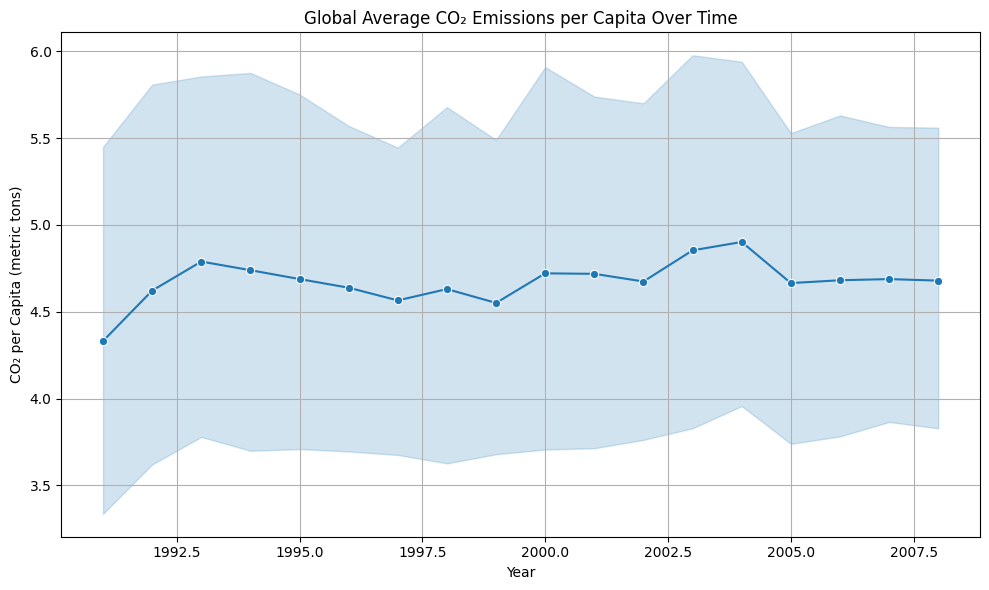

In [4]:
# Group by Year and calculate mean CO₂ per capita
df_yearly_avg = data.groupby('year')['co2_per_cap'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='co2_per_cap', marker='o')
plt.title('Global Average CO₂ Emissions per Capita Over Time')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

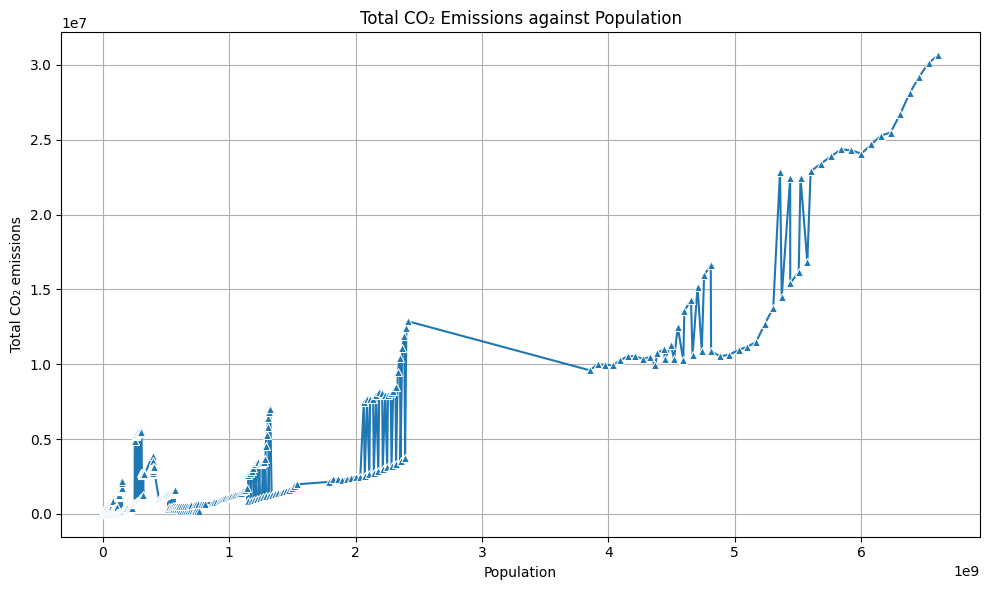

In [5]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='pop', y='co2_ttl', marker='^')
plt.title('Total CO₂ Emissions against Population')
plt.ylabel('Total CO₂ emissions')
plt.xlabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-7-3553458921.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top15, x="country", y="co2_ttl", palette="magma")


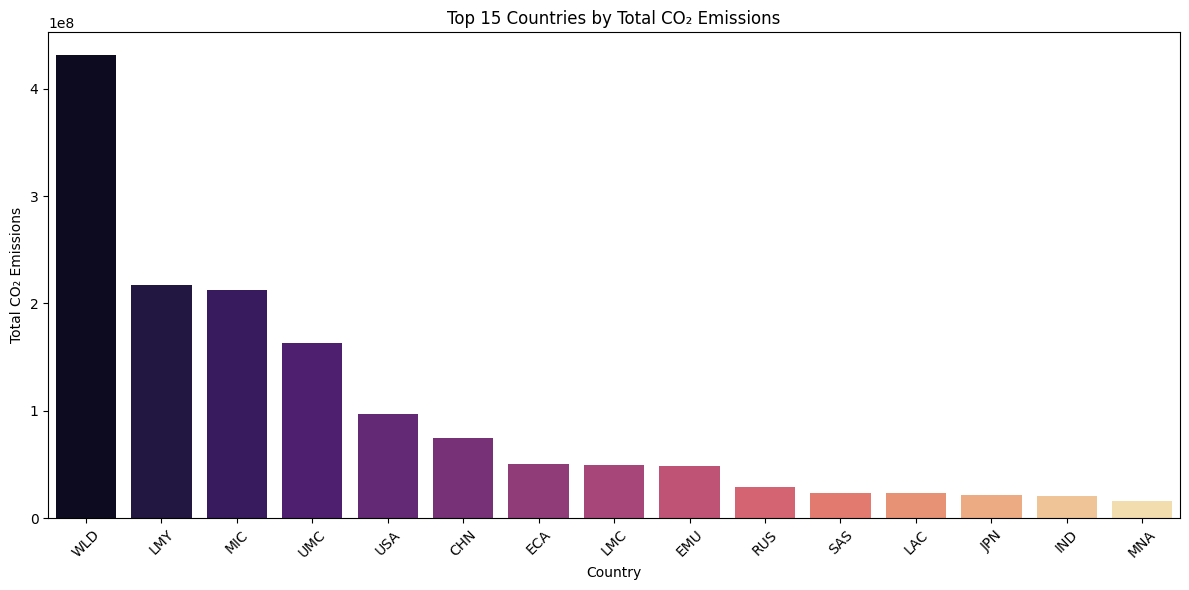

In [7]:
#plot for total co2 emissions by country



co2_by_country = data.groupby("country")["co2_ttl"].sum().reset_index()

# Sort and select top 15 countries
top15 = co2_by_country.sort_values(by="co2_ttl", ascending=False).head(15)


plt.figure(figsize=(12, 6))
sns.barplot(data=top15, x="country", y="co2_ttl", palette="magma")

plt.title("Top 15 Countries by Total CO₂ Emissions")
plt.xlabel("Country")
plt.ylabel("Total CO₂ Emissions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
data['en_ttl'] = data['en_per_gdp'] * data['gdp'] /1000

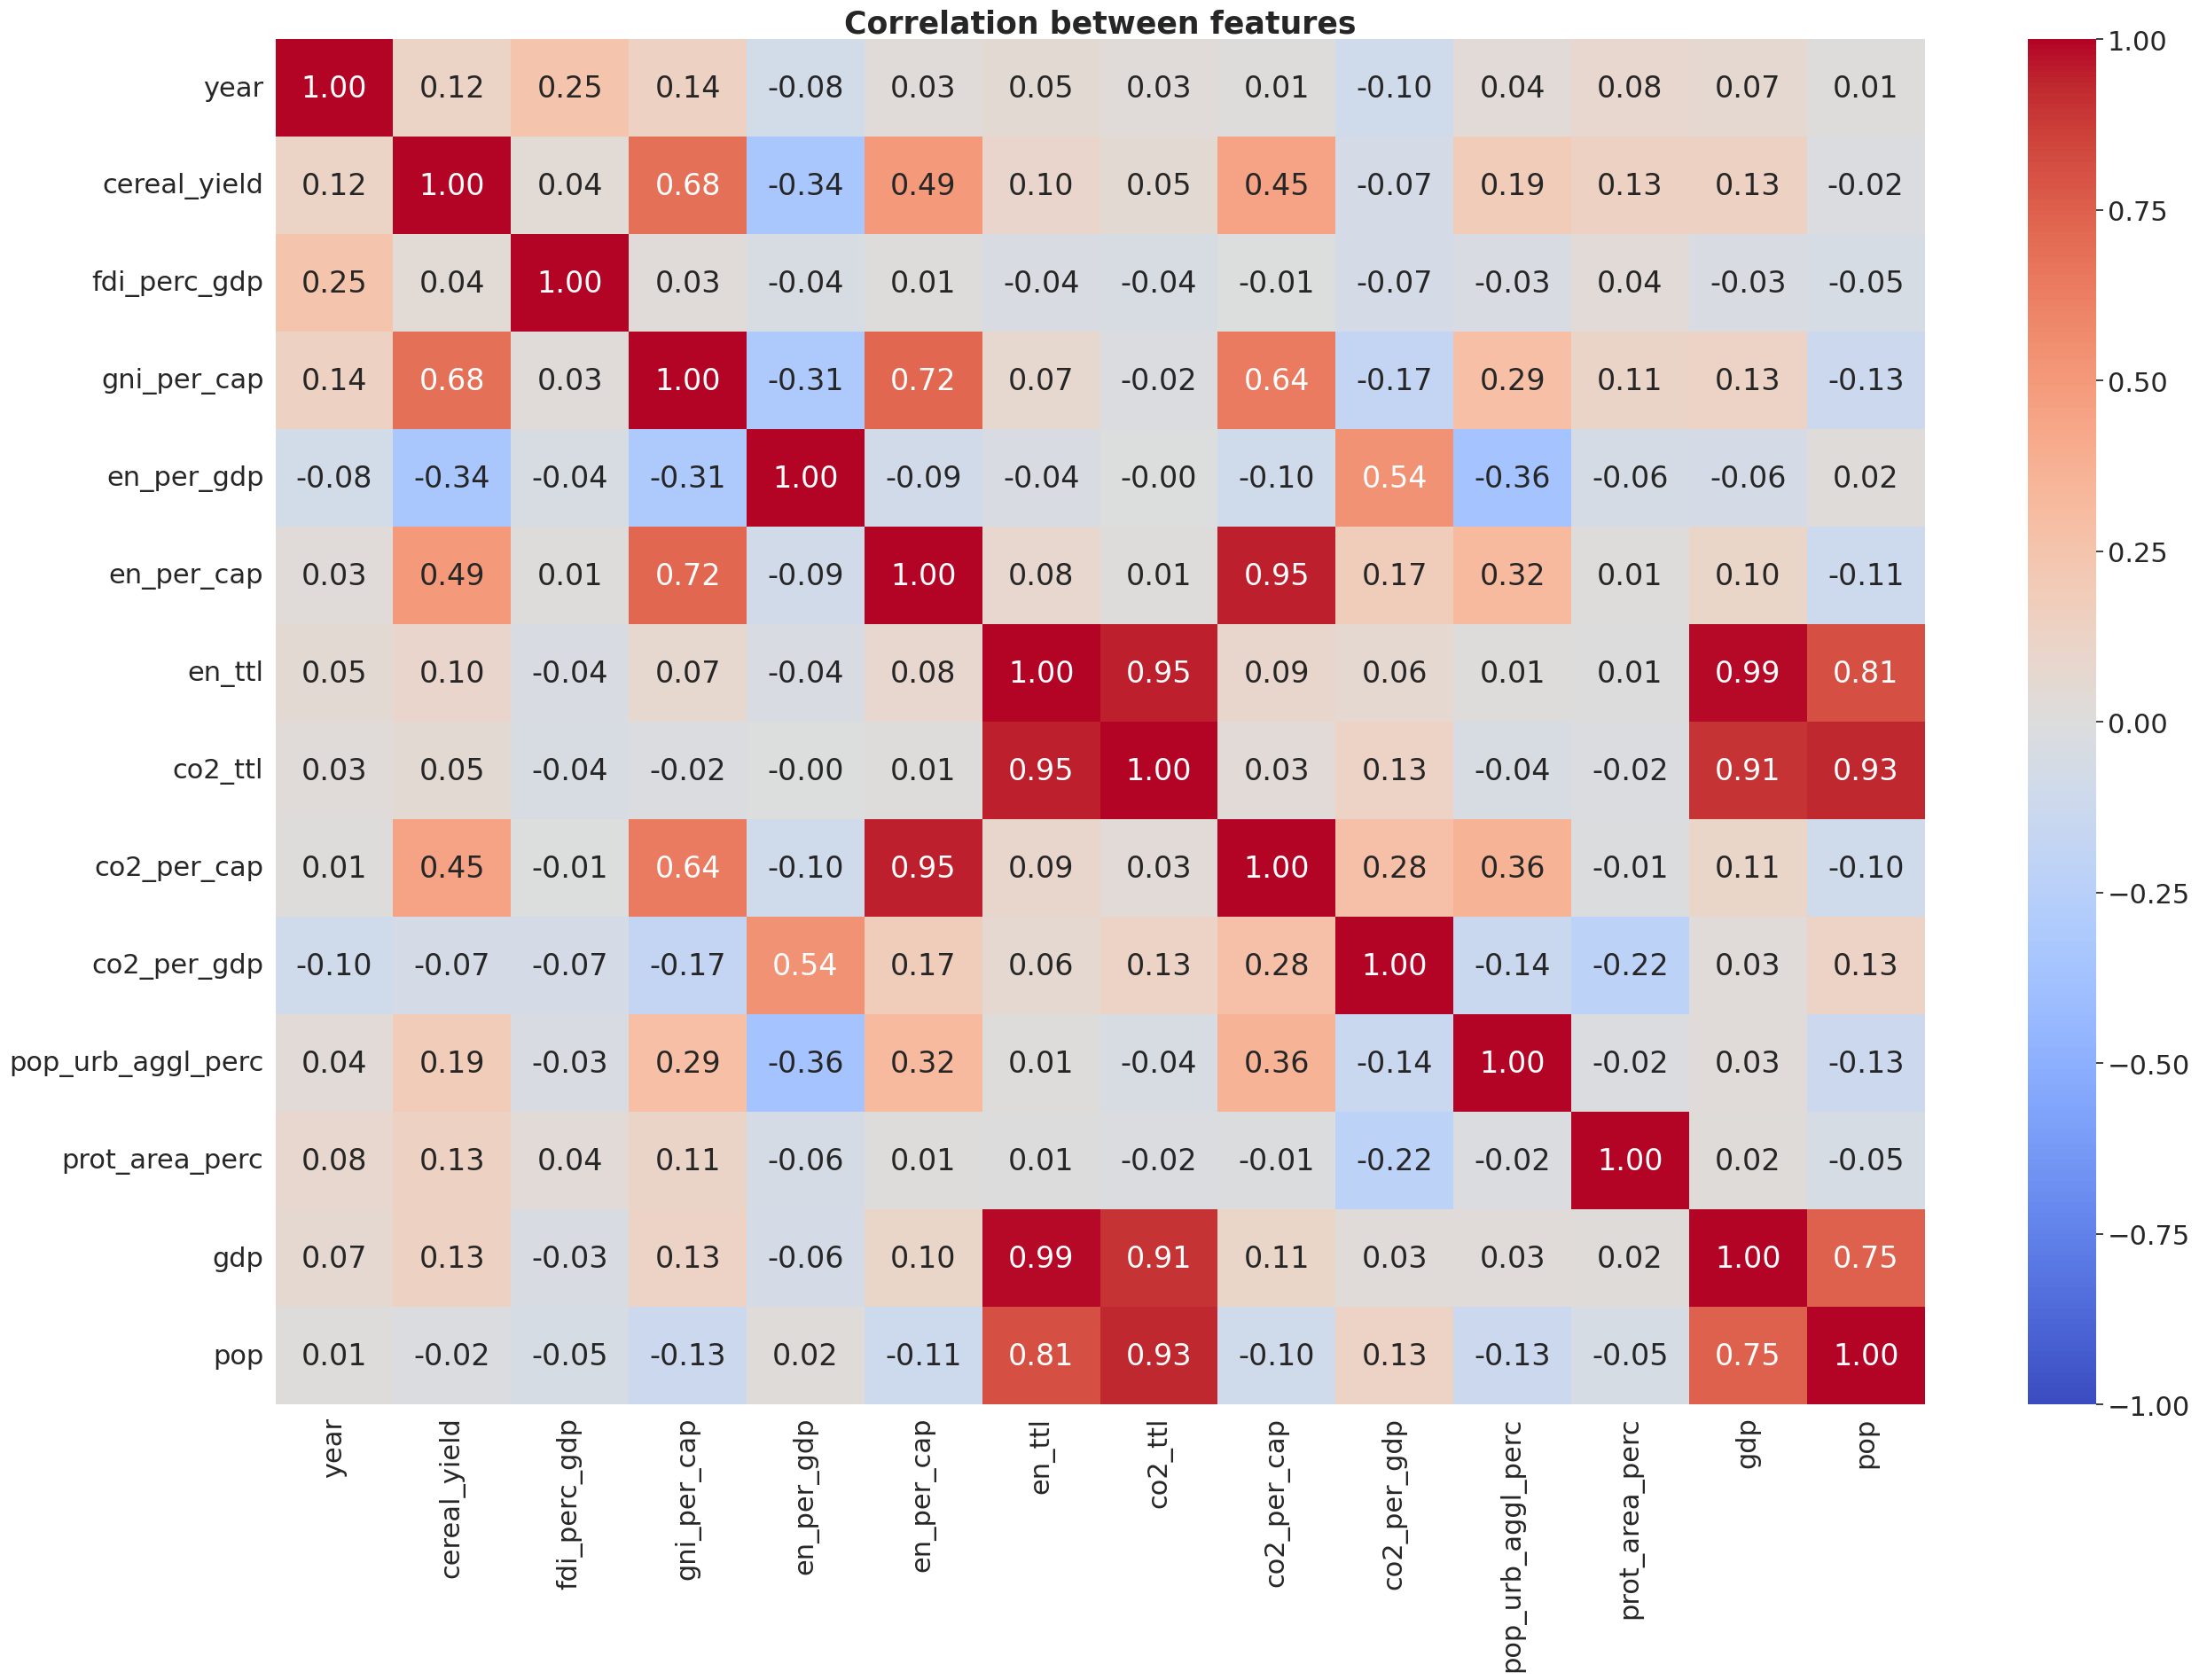

In [10]:

features_all = data[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap',
                     'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap',
                     'co2_per_gdp', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',
                     'pop']]


# correlation matrix
sns.set_theme(font_scale=2)
f,ax=plt.subplots(figsize=(30,20))
sns.heatmap(features_all.drop(['country'], axis=1).corr(), annot=True, cmap='coolwarm', fmt = ".2f",
            center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold' )
plt.show()

sns.set_theme(font_scale=1)

In [12]:
features_for_vif = data[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp']]


vif_data = pd.DataFrame()
vif_data["feature"] = features_for_vif.columns # Use the columns from the features_for_vif DataFrame
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i)
                   for i in range(features_for_vif.shape[1])] # Use the values and number of columns from features_for_vif
print(vif_data)

             feature        VIF
0       cereal_yield   1.414943
1       fdi_perc_gdp   0.956442
2        gni_per_cap   2.671030
3         en_per_cap  12.375968
4        co2_per_cap  10.517815
5  pop_urb_aggl_perc   0.828033
6     prot_area_perc   0.866753
7                gdp   1.097977


In [23]:
labels_dict = {'gni_per_cap':'GNI per capita [Atlas $]',
               'gdp':'Gross Domestic Product [$]',
               'cereal_yield':'Cereal yield [kg/ha]',
               'prot_area_perc': 'Nationally terrestrial protected areas [% of total land area]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'pop_urb_aggl_perc': 'Population in urban agglomerations > 1mln [%]',
               'co2_per_cap':'CO2 emissions per capita [t]',
               'urb_pop':'urban population',
               'en_per_cap':'Energy use per capita [kg oil eq]' }

In [14]:
unique_countries = data['country'].unique()
unique_countries

array(['AGO', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'BGD', 'BGR', 'BLR',
       'BOL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COG',
       'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'DOM', 'DZA', 'ECA', 'ECU',
       'EGY', 'EMU', 'ESP', 'ETH', 'FIN', 'FRA', 'GBR', 'GHA', 'GRC',
       'GTM', 'HND', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'ISR', 'ITA',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KOR', 'LAC', 'LIC', 'LMC', 'LMY',
       'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS', 'NGA', 'NLD', 'NZL',
       'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'ROM', 'RUS',
       'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR', 'TGO',
       'THA', 'TUR', 'TZA', 'UKR', 'UMC', 'URY', 'USA', 'UZB', 'VEN',
       'VNM', 'WLD', 'YEM', 'ZAF', 'ZAR', 'ZMB'], dtype=object)

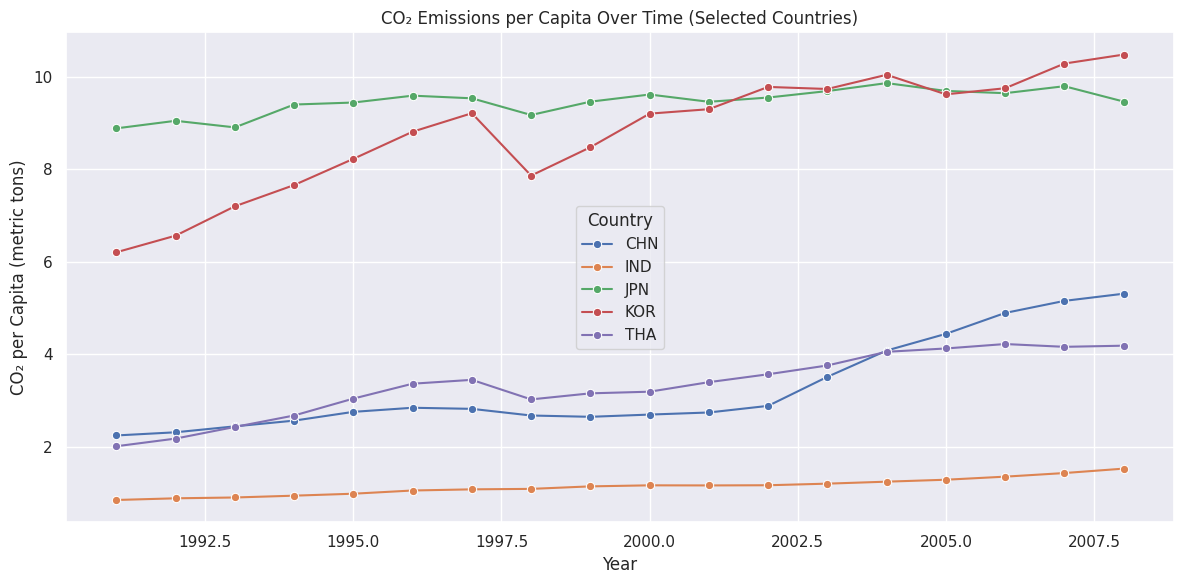

In [15]:

selected_countries = ['IND', 'JPN', 'KOR', 'CHN', 'THA']


df_selected = data[data['country'].isin(selected_countries)]

# Plot
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_selected, x='year', y='co2_per_cap', hue='country', marker='o')
plt.title('CO₂ Emissions per Capita Over Time (Selected Countries)')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:

chosen_countries=['IND', 'LMC', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS',
'NGA', 'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY',
'ROM', 'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR',
'TGO', 'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM',
'WLD', 'ZAF', 'ZAR', 'ZMB', 'ECA', 'POL', 'RUS', 'UKR', 'YEM',
'ETH', 'BEL']

features_chosen = features_all[features_all['country'].isin(chosen_countries)]

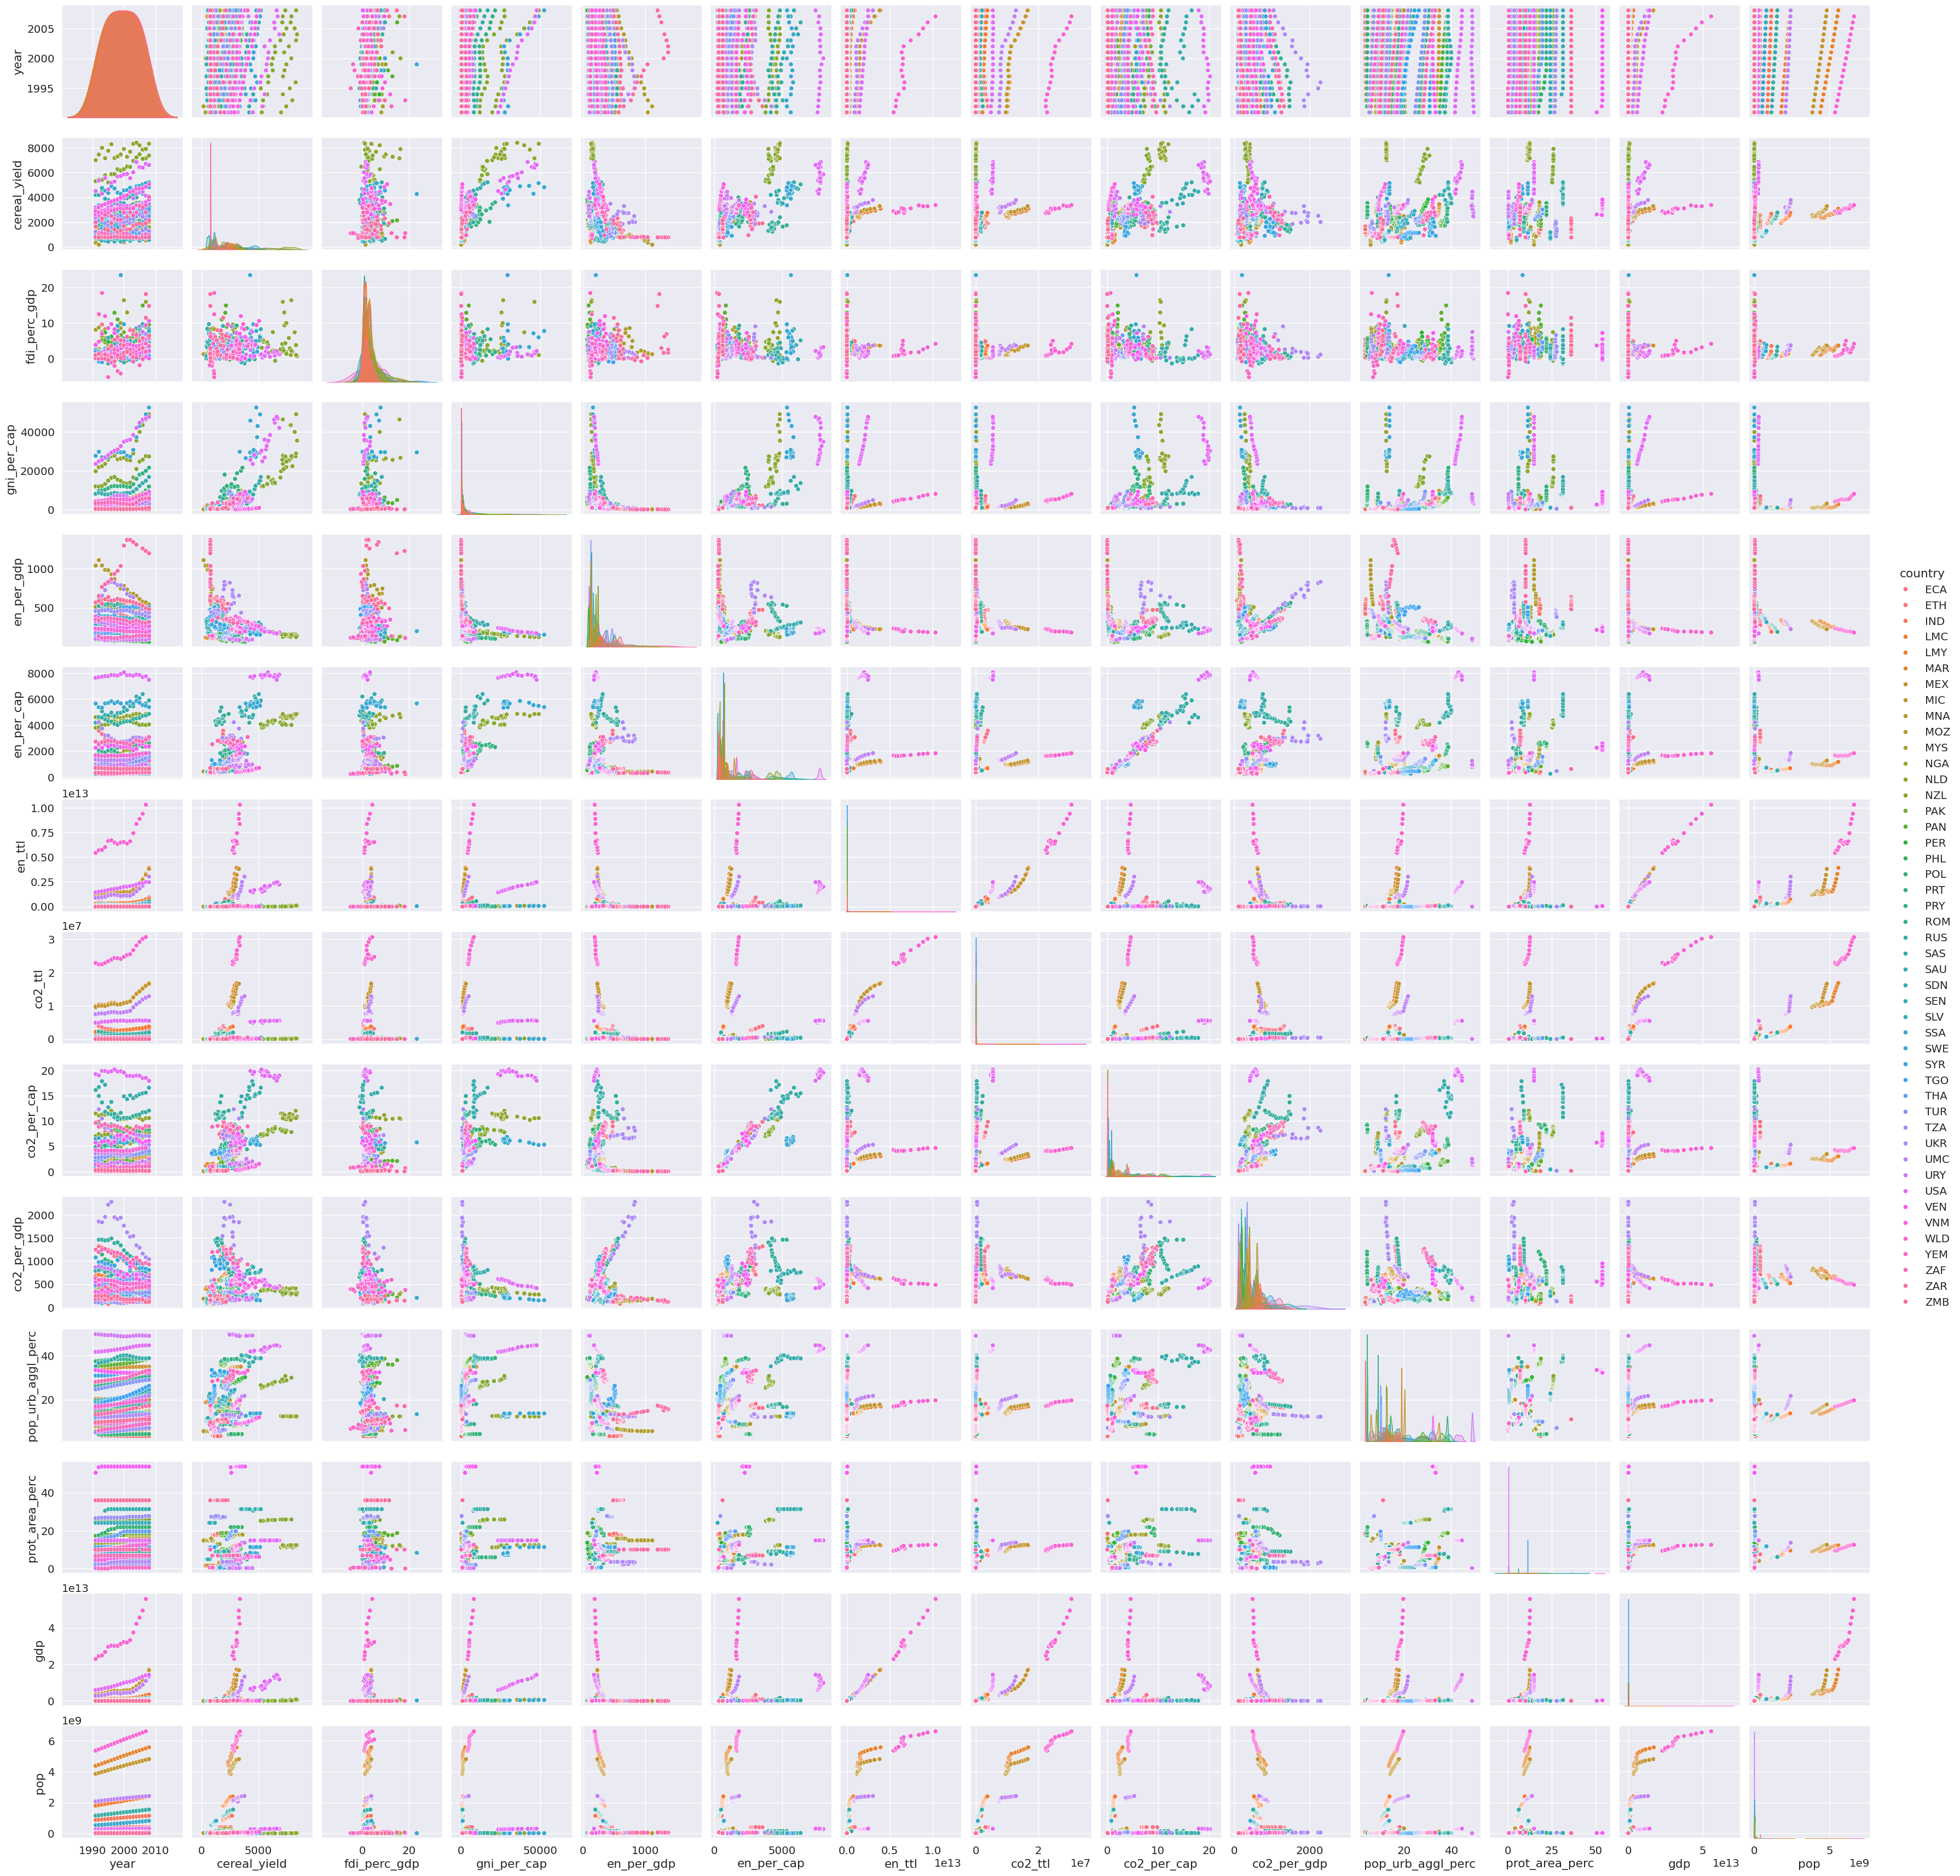

In [17]:
sns.set_theme(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='country')

In [20]:
# ARE is showing outliers so removing it from the list.
feature_cols = ['country', 'cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp', 'co2_per_cap','urb_pop']


features_for_plot = data[feature_cols].copy()


features_for_plot = features_for_plot[features_for_plot['country']!='ARE']

Text(115.34385937499995, 0.5, 'CO2 emissions per capita [t]')

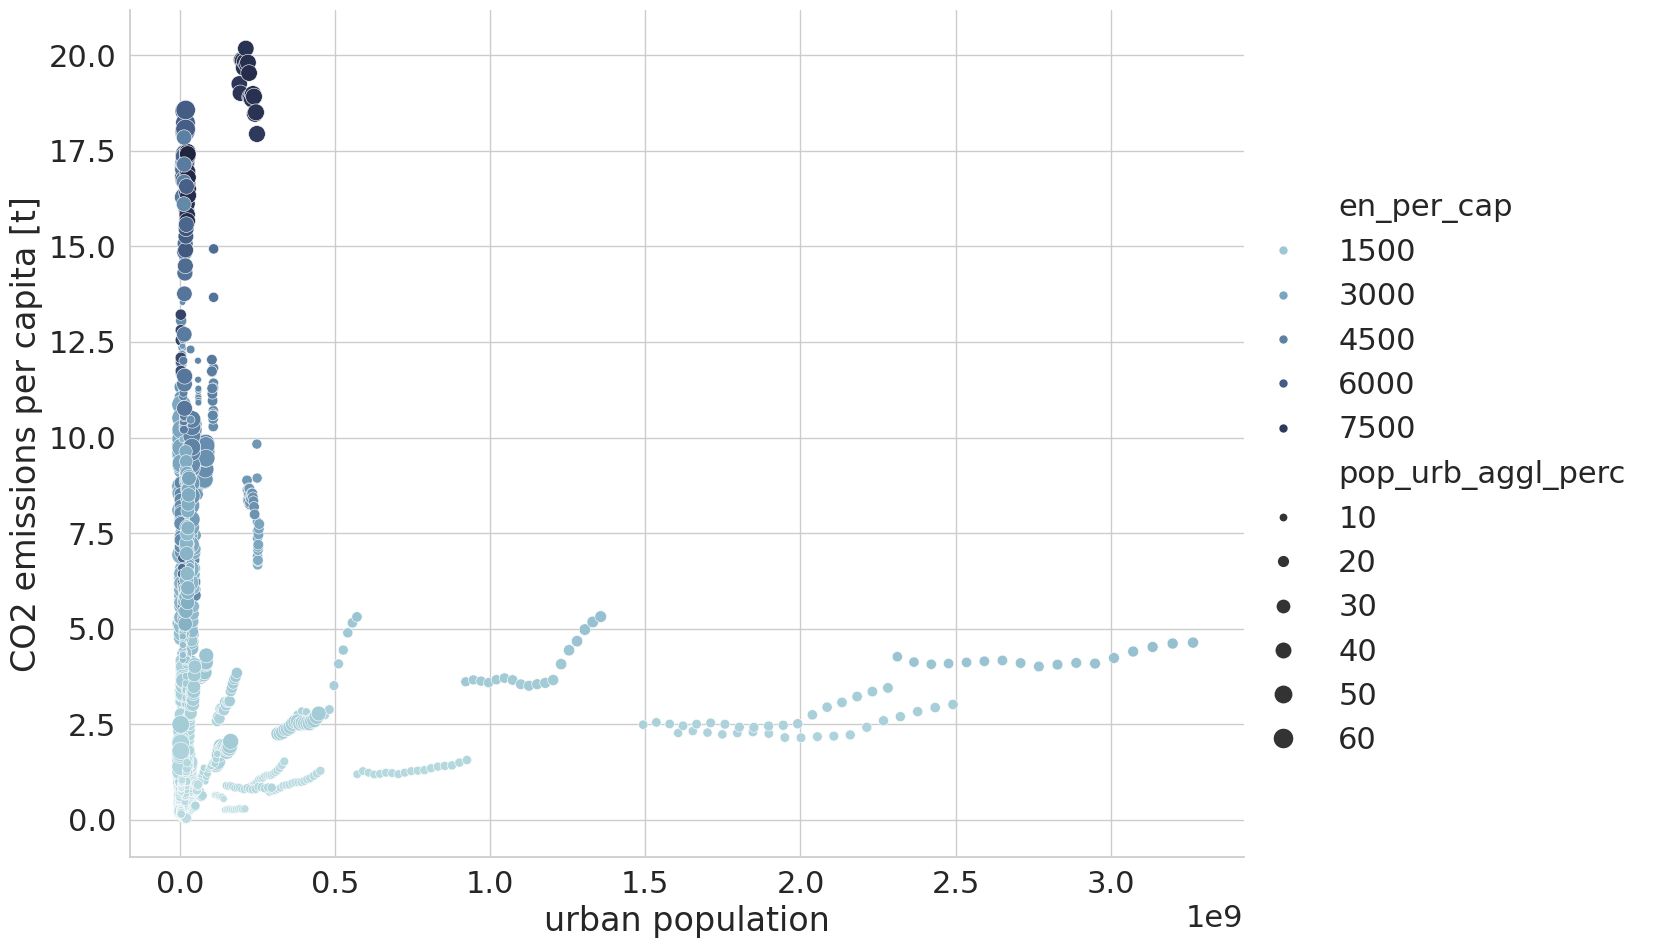

In [24]:
sns.set_theme(style="whitegrid", font_scale=2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=features_for_plot,
    x="urb_pop", y="co2_per_cap",
    hue="en_per_cap", size="pop_urb_aggl_perc",
    palette=cmap, sizes=(10, 200),
    height=10, aspect= 4/3
)

g.ax.set_xlabel(labels_dict['urb_pop'])
g.ax.set_ylabel(labels_dict['co2_per_cap'])